# Librerias 



In [369]:
import pandas as pd
import numpy as np
import sklearn as sk 
import matplotlib.pyplot as plt
#
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Importacion de datos del Norte

In [370]:
carga_data_norte = pd.read_table("Data_CargaNorte.txt", sep="\s+")

In [371]:
carga_data_norte

,Carga
0,16.853
1,16.450
2,16.517
3,16.873
4,17.064
...,...
8779,18.803
8780,17.964
8781,17.064
8782,16.360


In [372]:
temper_data_norte = pd.read_csv("Data_TemperNorte.txt", sep="\s+")

In [373]:
temper_data_norte

,Temperatura
0,7.777778
1,7.777778
2,7.222222
3,5.000000
4,3.888889
...,...
8779,10.000000
8780,9.444444
8781,9.444444
8782,10.555556


In [374]:
carga_axis_1 = np.array(carga_data_norte, dtype = float)

In [375]:
result = map(lambda n:n[0],carga_axis_1 )

In [376]:
carga_axis = list(result)

In [377]:
len(carga_axis)

8784

In [378]:
temper_axis_1 = np.array(temper_data_norte, dtype = float)


In [379]:
result = map(lambda n:n[0], temper_axis_1)

In [380]:
temper_axis = list(result)

In [381]:
len(temper_axis)

8784

## Funciones de Graficacion 

In [382]:
def grafica_unica(axis,titulo_grafica,etiqueta_x,etiqueta_y,color):
    x_axis = list(range(0,len(axis)))

    # Plot regression against actual data
    plt.figure(figsize=(12, 6))
    plt.plot(x_axis, axis, color = color)     # regression line
    #plt.plot(X, y, 'ro')   # scatter plot showing actual data
    plt.title(titulo_grafica)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)

    plt.show()

In [383]:
def grafica_multiples_muestras(muestras,titulo_grafica,etiqueta_x,etiqueta_y):
    
    # Plot regression against actual data
    plt.figure(figsize=(20, 10))
    for muestra in muestras:
        x,y,tipo_grafica,color = muestra
        plt.plot(x,y,tipo_grafica,color= color)     # regression line
    #plt.plot(X, y, 'ro')   # scatter plot showing actual data
    plt.title(titulo_grafica)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)

    plt.show()

## Grafica de Temperatura Norte

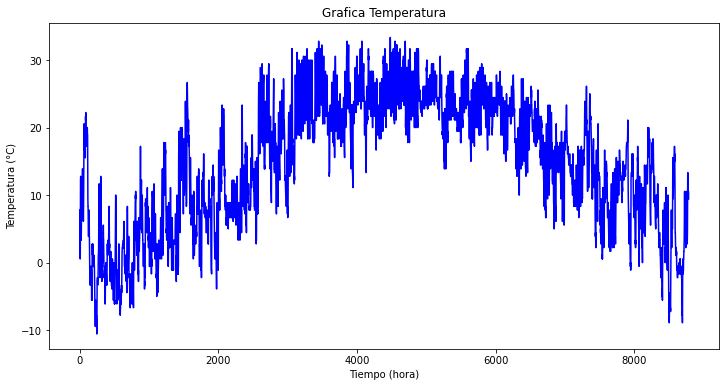

In [384]:
grafica_unica(temper_axis,"Grafica Temperatura", "Tiempo (hora)","Temperatura (°C)","blue")

## Grafica de Carga Norte

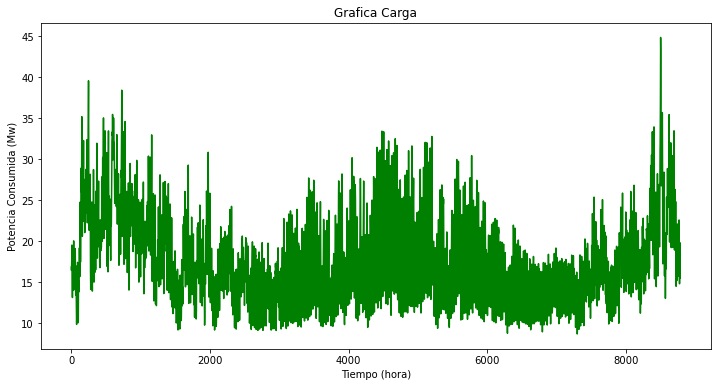

In [385]:
grafica_unica(carga_axis,"Grafica Carga", "Tiempo (hora)","Potencia Consumida (Mw)","green")

## Grafica de Relacion entre Carga y Temperatura (Norte)

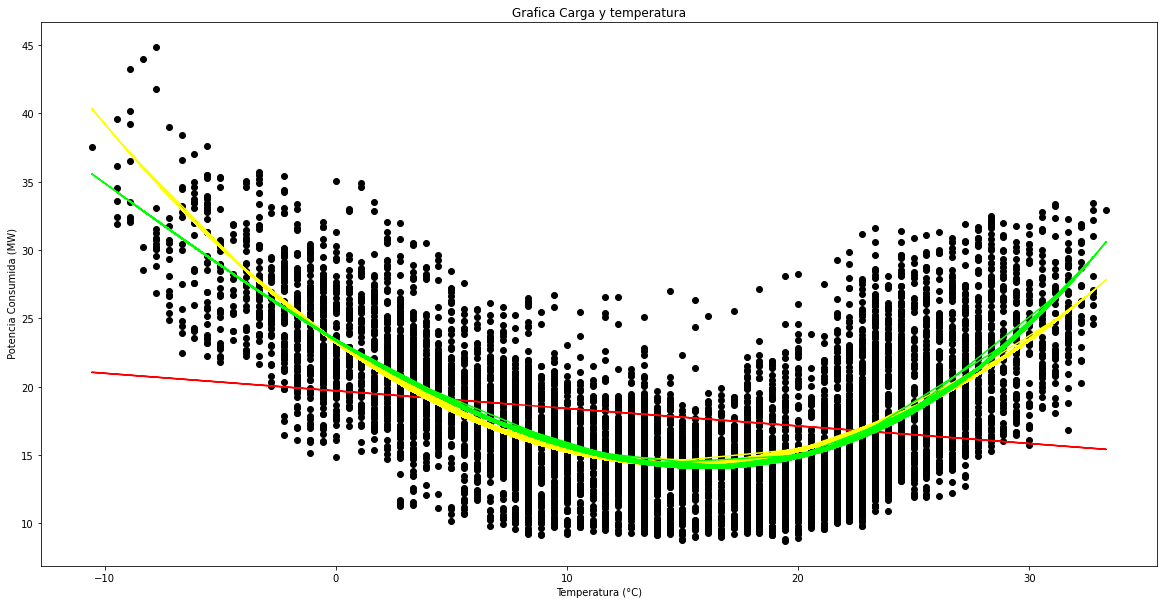

In [387]:
# MODELO LINEAL
model_lineal = LinearRegression()
model_lineal.fit(temper_axis_1, carga_axis_1)
carga_pred = model_lineal.predict(temper_axis_1)
#  (x, carga_pred, '', 'blue') 
# MODELO CUADRATICO
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(temper_axis_1)
model_lineal.fit(x_poly, carga_axis_1)
y_pred = model_lineal.predict(x_poly)

# MODELO CUBICO
poly3 = PolynomialFeatures(degree=3, include_bias=False)
x_poly3 = poly3.fit_transform(temper_axis_1)
model_lineal.fit(x_poly3, carga_axis_1)
y_pred3 = model_lineal.predict(x_poly3)

# GRAFICACION 
grafica_multiples_muestras([
    (temper_axis,carga_axis,"ro","Black"), # RELACION TEMPERATURA Y CONSUMO 
    (temper_axis, carga_pred, '', "red"), # REGRESION LINEAL 
    (temper_axis, y_pred, '', "yellow"), # REEGRESION CUADRATICA
    (temper_axis, y_pred3, '', "lime") # REGRESION CUBICA
],"Grafica Carga y temperatura", "Temperatura (°C)"," Potencia Consumida (MW)")